In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stocks-where-is-my-cyber-truck/tesla_stonks_up_and_down.csv


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [131]:
tesla_stock = pd.read_csv("/kaggle/input/tesla-stocks-where-is-my-cyber-truck/tesla_stonks_up_and_down.csv")

In [132]:
tesla_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [133]:
tesla_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3001,2022-05-31,773.840027,778.799988,734.229980,758.260010,758.260010,33971500
3002,2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300
3003,2022-06-02,732.469971,792.630005,726.200012,775.000000,775.000000,31157700
3004,2022-06-03,729.679993,743.390015,700.250000,703.549988,703.549988,37348100
3005,2022-06-06,733.059998,734.599976,703.049988,714.840027,714.840027,28015600


In [134]:
tesla_stock.shape

(3006, 7)

In [135]:
tesla_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3006 non-null   object 
 1   Open       3006 non-null   float64
 2   High       3006 non-null   float64
 3   Low        3006 non-null   float64
 4   Close      3006 non-null   float64
 5   Adj Close  3006 non-null   float64
 6   Volume     3006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 164.5+ KB


In [136]:
tesla_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3.006000e+03
mean,151.264808,154.647777,147.546725,151.202672,151.202672,3.125754e+07
std,266.832361,273.025681,259.799625,266.531483,266.531483,2.776981e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,21.010500,21.893000,20.280500,21.028500,21.028500,1.340600e+07
50%,47.109999,47.948000,46.224001,47.112001,47.112001,2.509325e+07
75%,69.123503,70.139002,67.935501,69.124502,69.124502,3.959588e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [137]:
# checking of null values:
tesla_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

So, There is no null values present in data 

In [138]:
correlation = tesla_stock_new.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999729,0.999585,0.999198,0.999198,0.076439
High,0.999729,1.000000,0.999581,0.999631,0.999631,0.080071
Low,0.999585,0.999581,1.000000,0.999669,0.999669,0.072758
Close,0.999198,0.999631,0.999669,1.000000,1.000000,0.077232
Adj Close,0.999198,0.999631,0.999669,1.000000,1.000000,0.077232
Volume,0.076439,0.080071,0.072758,0.077232,0.077232,1.000000


<AxesSubplot:>

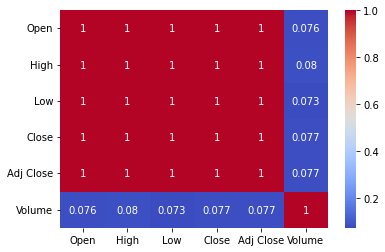

In [139]:
sns.heatmap(correlation, annot=True, cmap = 'coolwarm')

In [140]:
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])
tesla_stock['Year'] = tesla_stock['Date'].dt.year
tesla_stock['Month'] = tesla_stock['Date'].dt.month
tesla_stock['Day'] = tesla_stock['Date'].dt.day

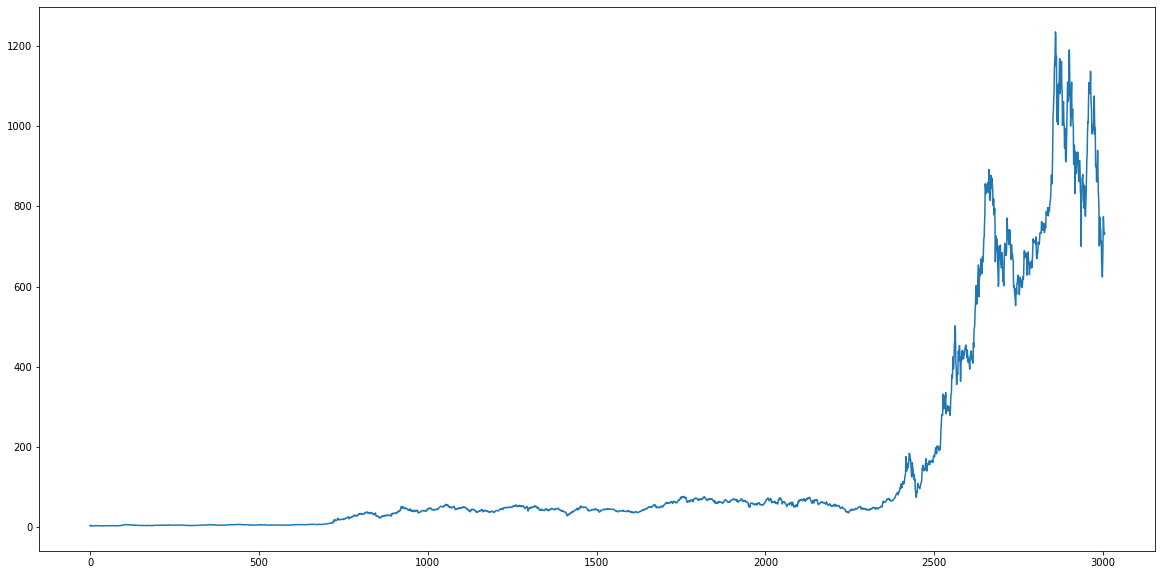

In [141]:
plt.figure(figsize=(20,10))
plt.plot(tesla_stock_new['Open'])

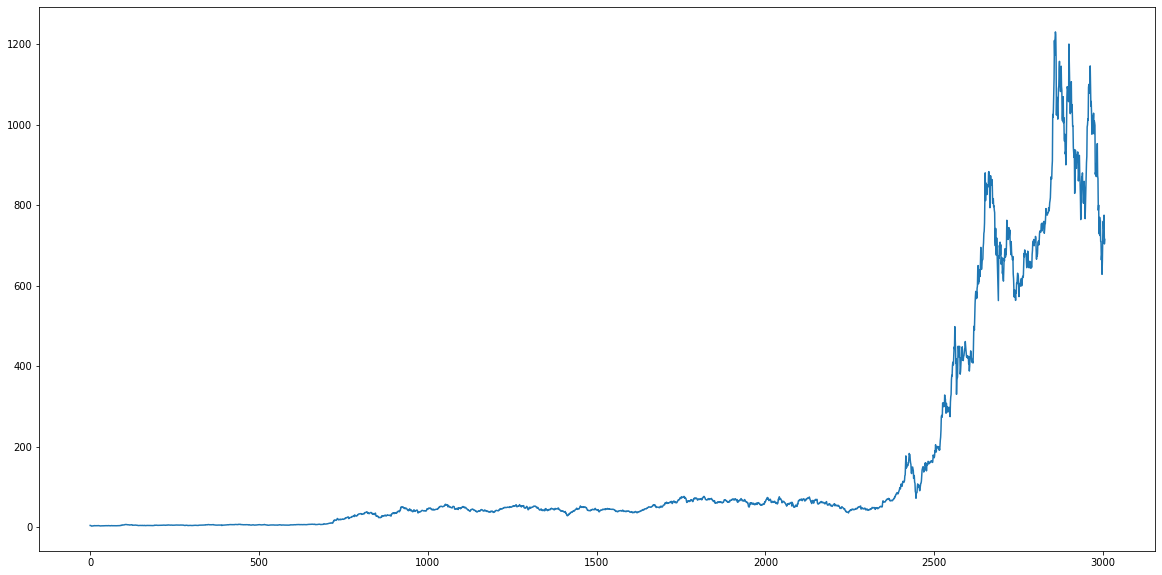

In [142]:
plt.figure(figsize=(20,10))
plt.plot(tesla_stock_new['Close'])

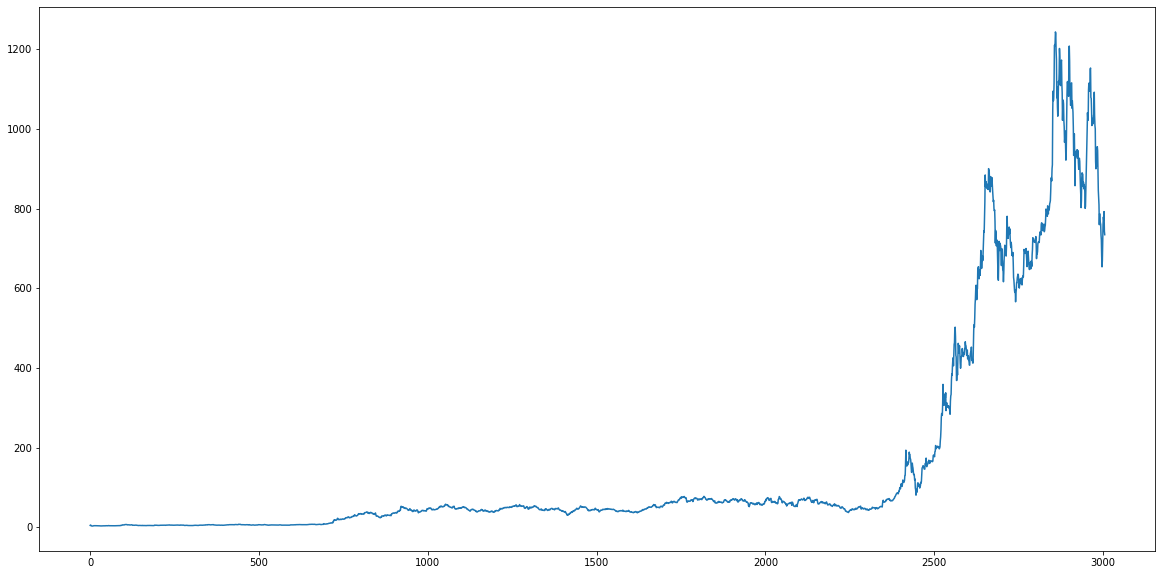

In [143]:
plt.figure(figsize=(20,10))
plt.plot(tesla_stock['High'])

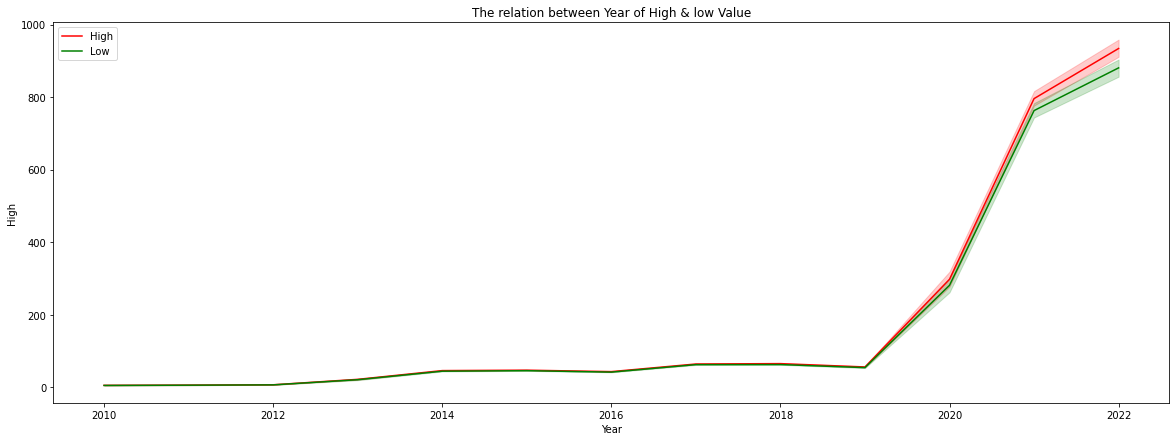

In [144]:
plt.figure(figsize=(20,7))
sns.lineplot(data=tesla_stock,x="Year",y="High",color="red",label="High")
sns.lineplot(data=tesla_stock,x="Year",y="Low",color="green",label="Low")

plt.title("The relation between Year of High & low Value")
plt.legend()

Text(0.5, 1.0, 'The relation between Date of High & low Value')

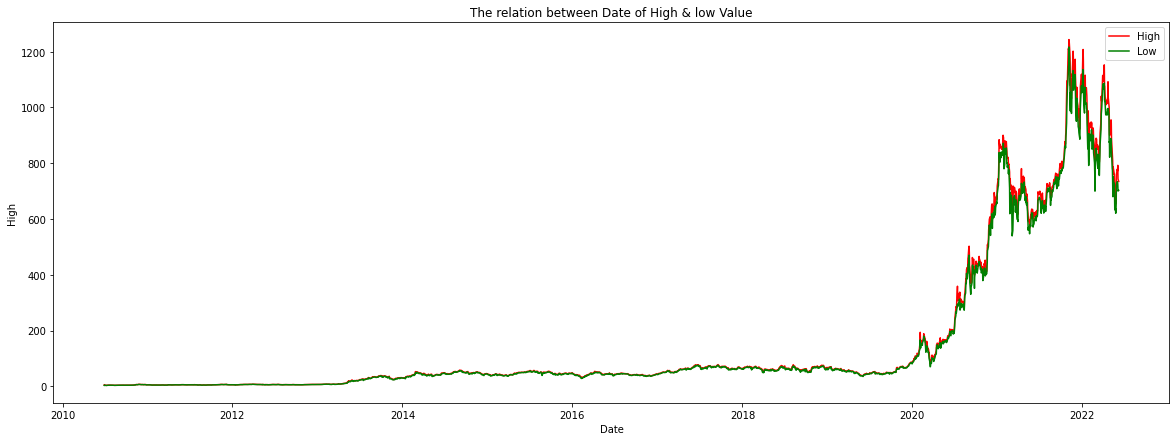

In [145]:
plt.figure(figsize=(20,7))
sns.lineplot(data=tesla_stock,x="Date",y="High",color="red",label="High")
sns.lineplot(data= tesla_stock,x="Date",y="Low",color="green",label="Low")

plt.title("The relation between Date of High & low Value")

Text(0.5, 1.0, 'The relation between Date of OPEN & CLOSE Value')

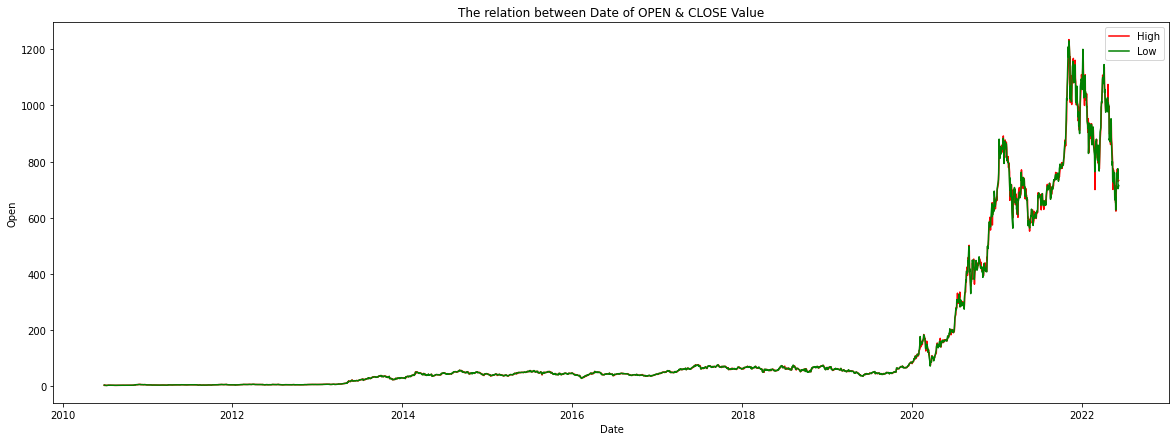

In [146]:
plt.figure(figsize=(20,7))
sns.lineplot(data=tesla_stock,x="Date",y="Open",color="red",label="High")
sns.lineplot(data=tesla_stock,x="Date",y="Close",color="green",label="Low")

plt.legend()
plt.title("The relation between Date of OPEN & CLOSE Value")

Text(0.5, 1.0, 'Count of Volume')

<Figure size 1440x504 with 0 Axes>

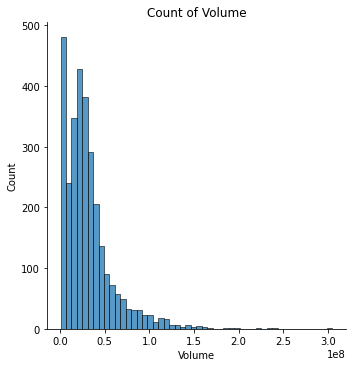

In [147]:
plt.figure(figsize=(20,7))
sns.displot(tesla_stock['Volume'],bins=50)
plt.title("Count of Volume")

Text(0.5, 1.0, ' relation between data and volume')

<Figure size 1440x504 with 0 Axes>

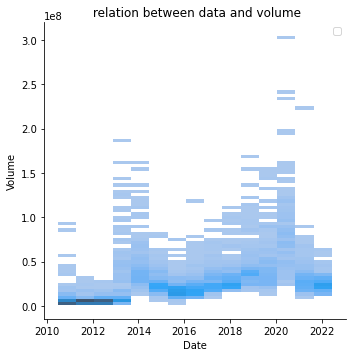

In [148]:
# relation between data and volume using displot
plt.figure(figsize=(20,7))
sns.displot(data = tesla_stock, y= 'Volume', x= 'Date')
plt.legend()
plt.title(" relation between data and volume")

Text(0.5, 1.0, 'The relation between  Date of Volume')

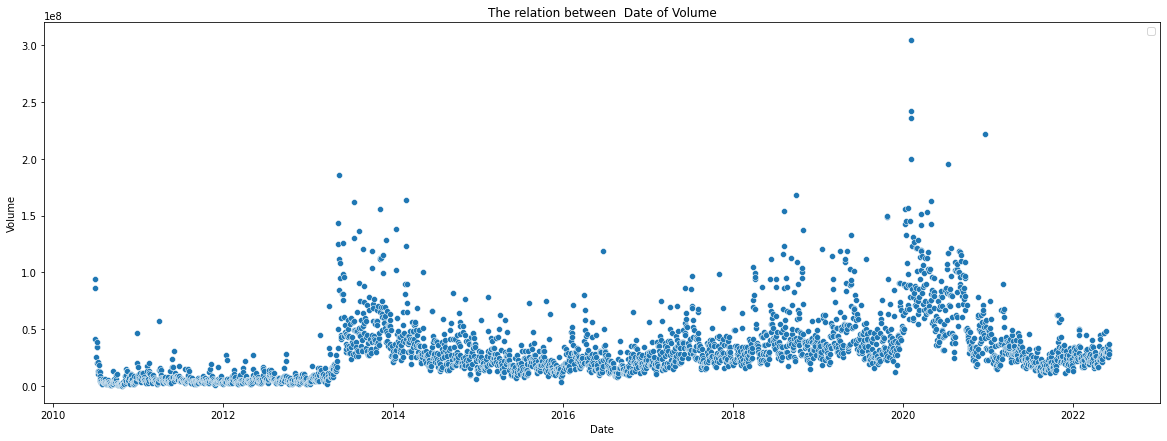

In [149]:
# relation between data and volume using Scatter plot
plt.figure(figsize=(20,7))
sns.scatterplot(data=tesla_stock,x="Date",y="Volume",)
plt.legend()
plt.title("The relation between  Date of Volume")

Text(0.5, 1.0, 'The relation between  Date of Volume')

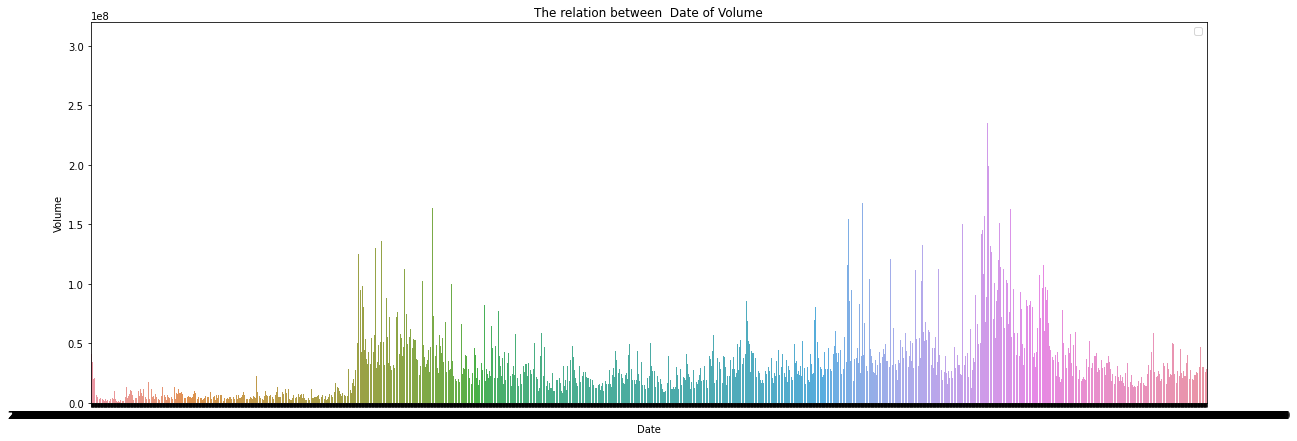

In [150]:
# relation between data and volume using bar graph
plt.figure(figsize=(20,7))
sns.barplot(data=tesla_stock,x="Date",y="Volume",)
plt.legend()
plt.title("The relation between  Date of Volume")

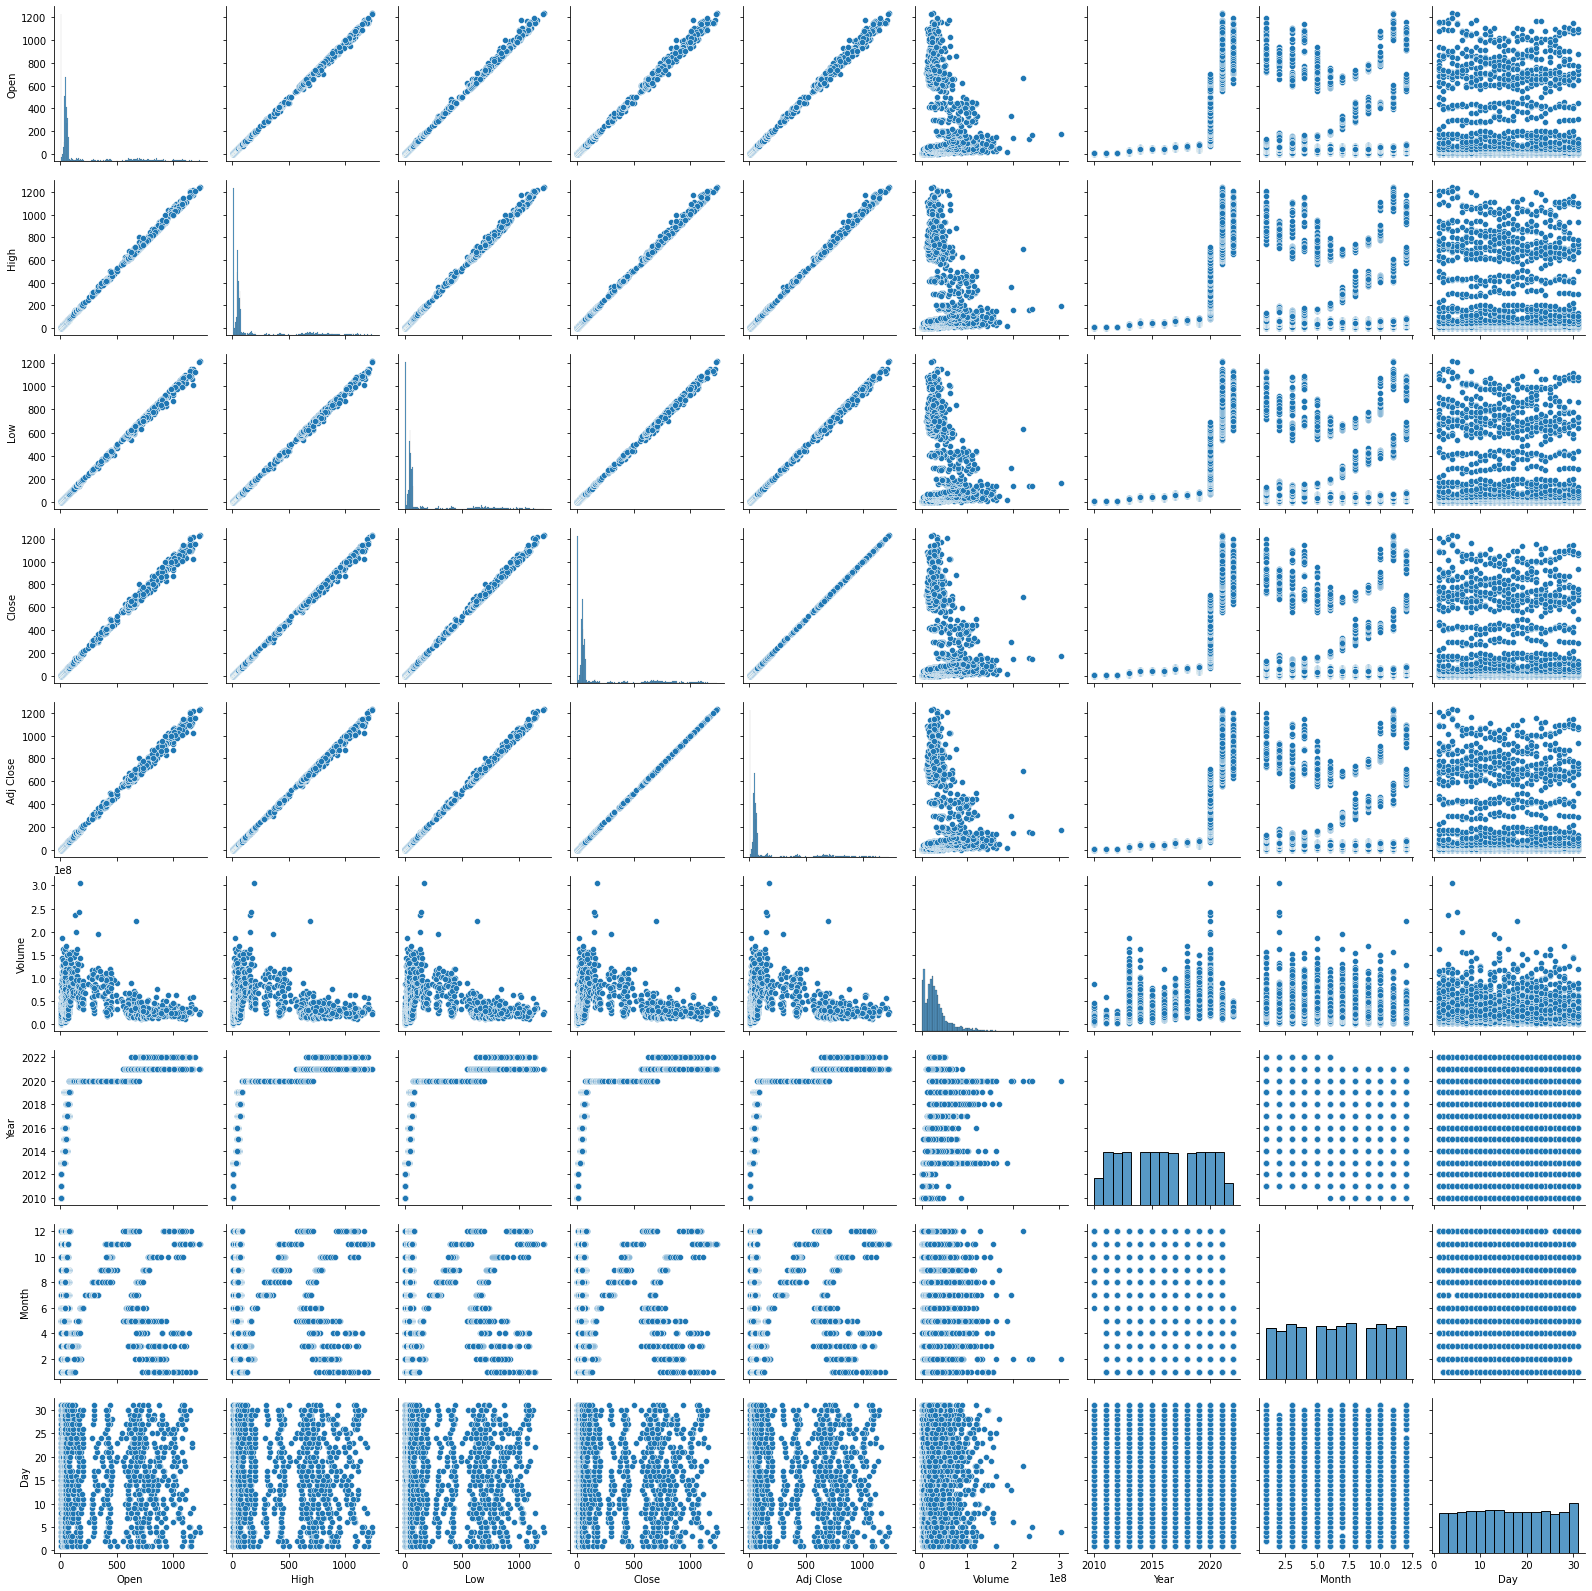

In [151]:
sns.pairplot(tesla_stock[1:])

In [152]:
# different tpyes of moving averages :
# 10 days moving average
tesla_stock['MA10'] = tesla_stock['Adj Close'].rolling(window = 10).mean()

# 30 days moving average
tesla_stock['MA30'] = tesla_stock['Adj Close'].rolling(window = 30).mean()

# 50 days moving average
tesla_stock['MA50'] = tesla_stock['Adj Close'].rolling(window = 50).mean()

# 100 days moving average
tesla_stock['MA100'] = tesla_stock['Adj Close'].rolling(window = 100).mean()

# 200 days moving average
tesla_stock['MA200'] = tesla_stock['Adj Close'].rolling(window = 200).mean()


In [153]:
# For plotting different moving average graph function
def plot_ma(Mov_avg):
    plt.figure(figsize = (18,10))
    plt.plot(tesla_stock['Close'])
    plt.plot(tesla_stock[Mov_avg])
    plt.legend(['Close', Mov_avg])
    plt.title('Close Price and Mean Average', fontsize = 20)

None


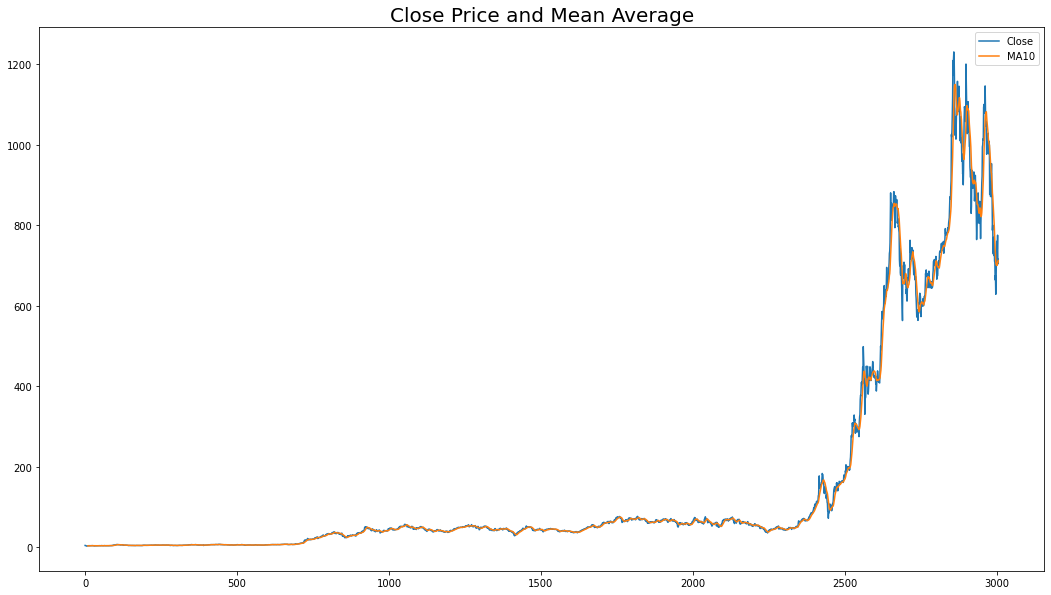

In [154]:
# 10 days moving average plot :
print(plot_ma('MA10'))

None


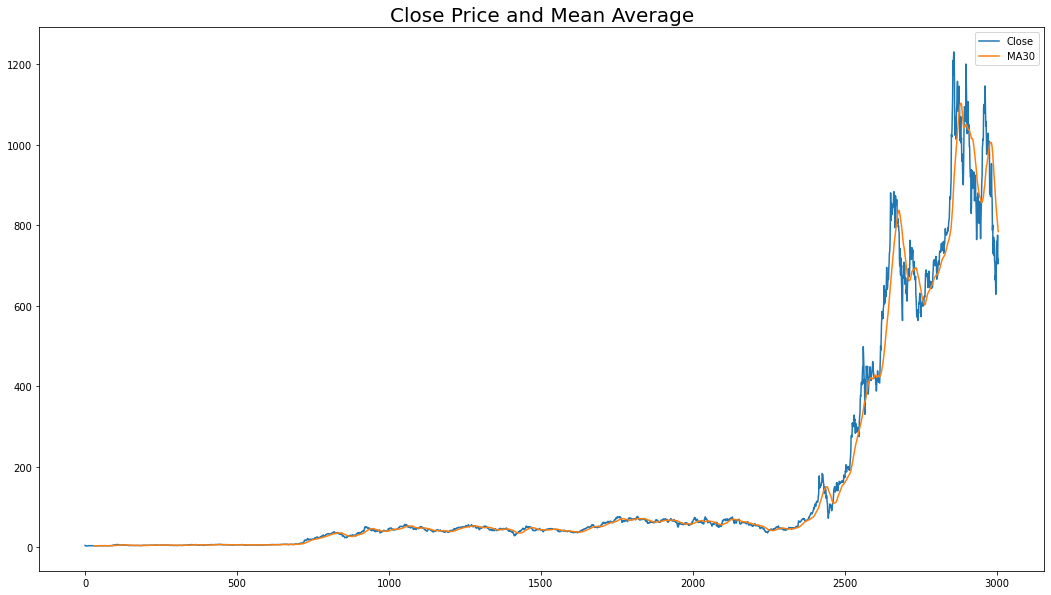

In [155]:
# 30 days moving average plot :
print(plot_ma('MA30'))

None


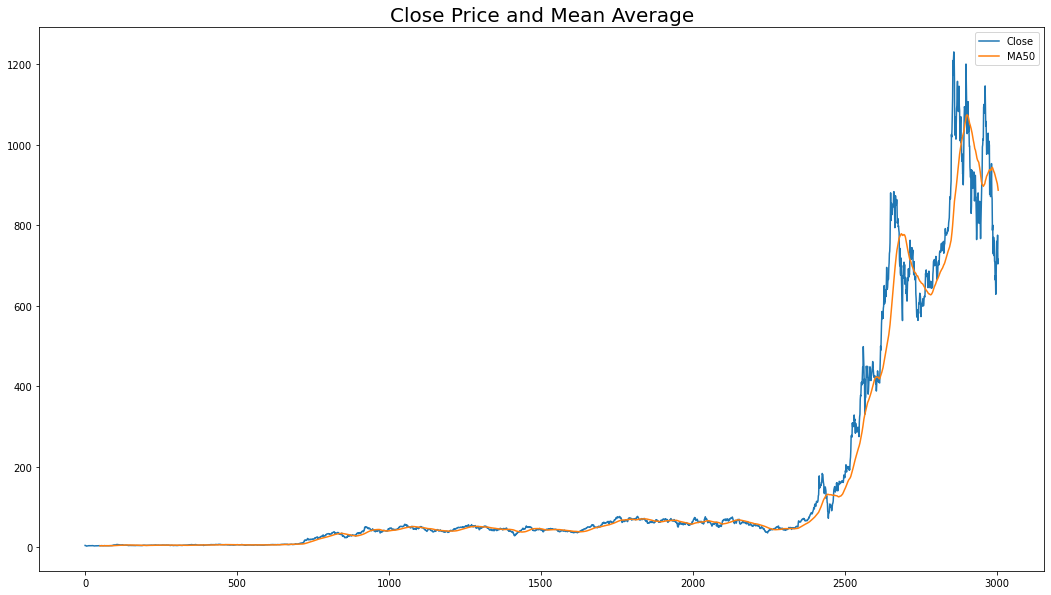

In [156]:
# 50 days moving average plot :
print(plot_ma('MA50'))

None


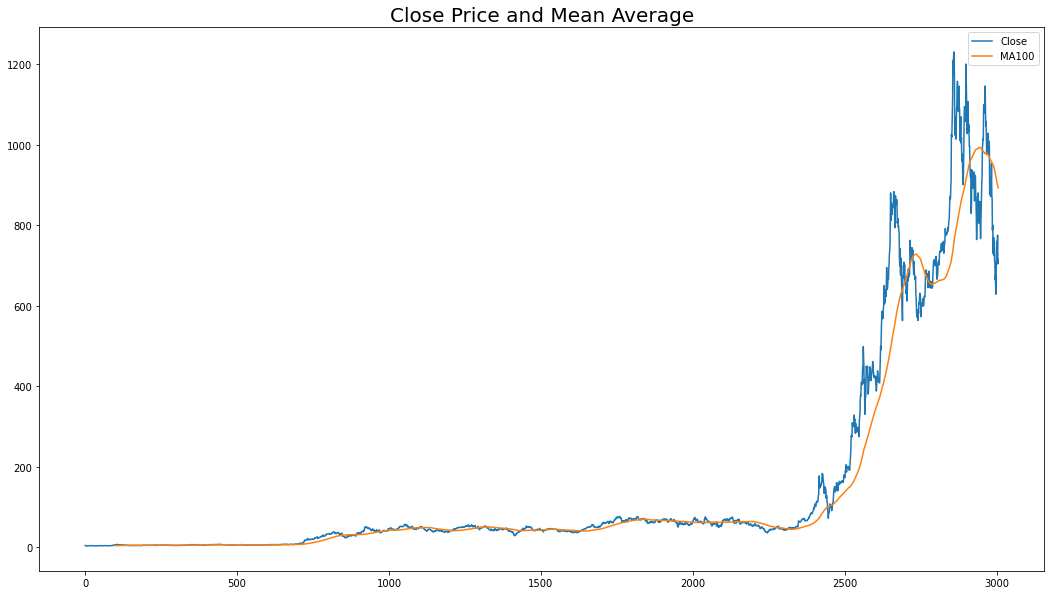

In [157]:
# 100 days moving average plot :
print(plot_ma('MA100'))

None


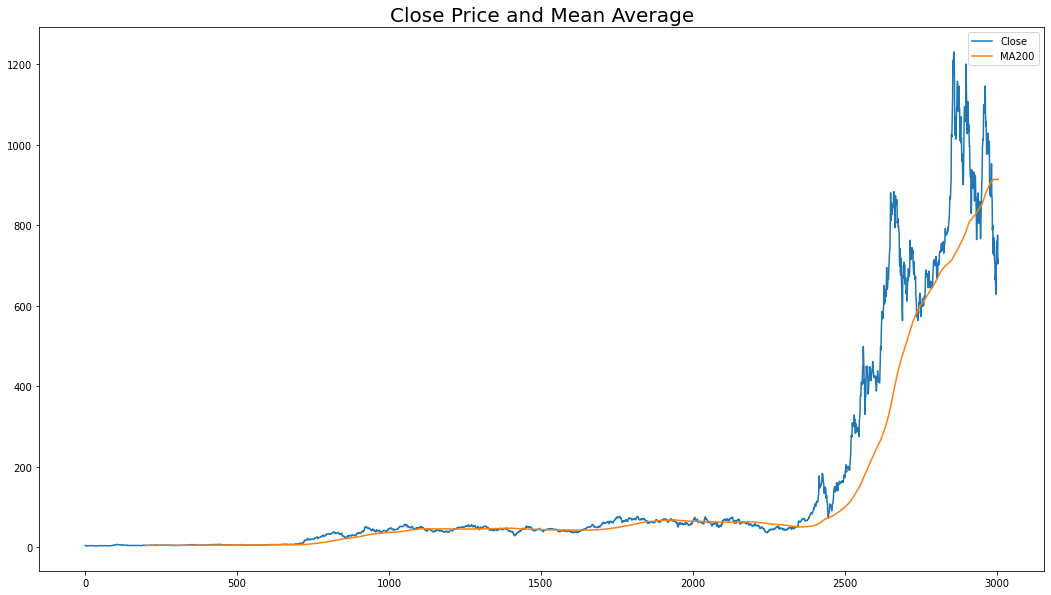

In [158]:
# 200 days moving average plot :
print(plot_ma('MA200'))

# Bollinger Bands Method
Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by **John Bollinger** in the 1980s

A Bollinger Band® is a technical analysis tool defined by a set of trendlines plotted two **standard deviations** (positively and negatively) away from a **simple moving average** (SMA) of a security's price, but which can be adjusted to user preferences.

1. Bollinger Bands® are a technical analysis tool developed by John Bollinger for **generating oversold or overbought signals.**
2. There are three lines that compose Bollinger Bands: A simple moving average (middle band) and an upper and lower band.
3. The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average, but they can be modified.

In [159]:
period = 20
# simple moving average
tesla_stock['MA'] = tesla_stock['Close'].rolling(window = period).mean()
# Standard Deviation
tesla_stock['STD'] = tesla_stock['Close'].rolling(window = period).std()
#Upper Band
tesla_stock['Upper'] = tesla_stock['MA'] + (tesla_stock['STD'] * 2)
#Lower Band
tesla_stock['Lower'] = tesla_stock['MA'] - (tesla_stock['STD'] * 2)

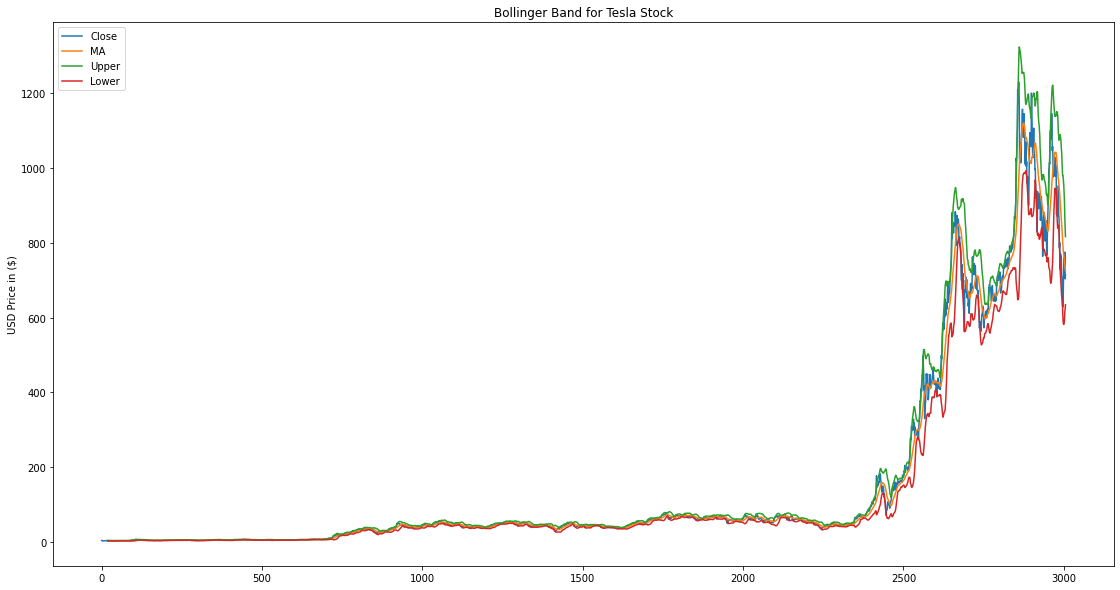

In [160]:
column_list = ['Close','MA','Upper','Lower']
tesla_stock[column_list].plot(figsize = (19,10))
plt.title('Bollinger Band for Tesla Stock')
plt.ylabel('USD Price in ($)')
plt.show()

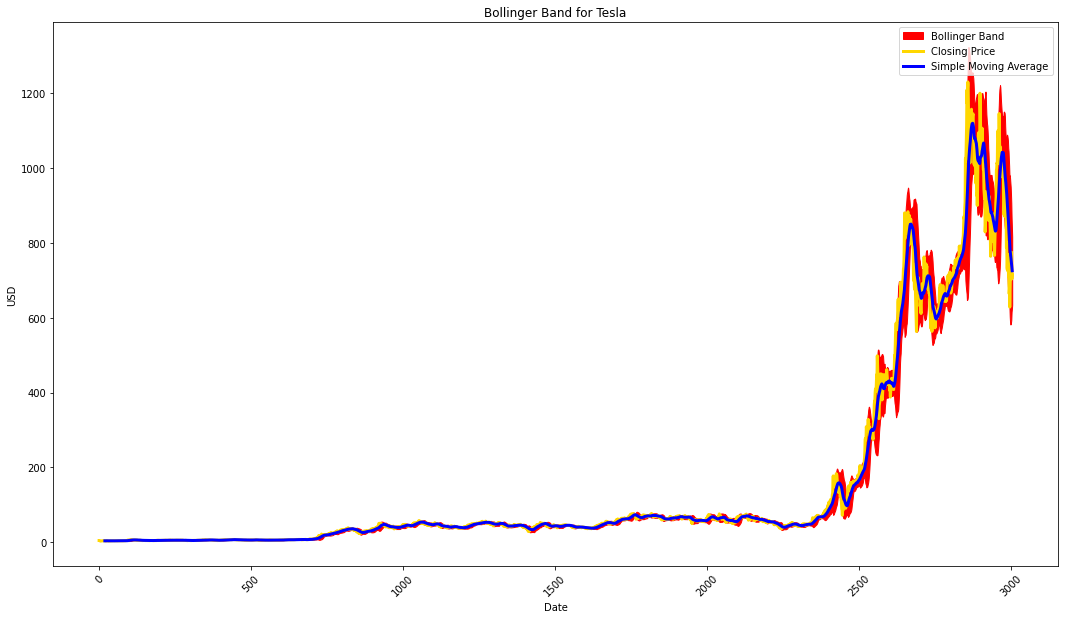

In [161]:
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(1,1,1)
x_axis = tesla_stock.index
ax.fill_between(x_axis,tesla_stock['Upper'], tesla_stock['Lower'],label ='Bollinger Band',color = 'red')
ax.plot(x_axis, tesla_stock['Close'], color = 'gold',lw = 3, label= 'Closing Price')
ax.plot(x_axis, tesla_stock['MA'], color = 'blue', lw=3, label='Simple Moving Average')
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD')
plt.xticks(rotation = 45)
ax.legend()
plt.show()